# Alpha Vantage API

In [1]:
import requests
url1 = 'https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=Apple&apikey=HZ8QGOLXW2U01N2E'
r1 = requests.get(url1)
data = r1.json()
data

{'bestMatches': [{'1. symbol': 'APLE',
   '2. name': 'Apple Hospitality REIT Inc',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '0.8889'},
  {'1. symbol': 'AAPL',
   '2. name': 'Apple Inc',
   '3. type': 'Equity',
   '4. region': 'United States',
   '5. marketOpen': '09:30',
   '6. marketClose': '16:00',
   '7. timezone': 'UTC-04',
   '8. currency': 'USD',
   '9. matchScore': '0.7143'},
  {'1. symbol': 'AAPL34.SAO',
   '2. name': 'Apple Inc',
   '3. type': 'Equity',
   '4. region': 'Brazil/Sao Paolo',
   '5. marketOpen': '10:00',
   '6. marketClose': '17:30',
   '7. timezone': 'UTC-03',
   '8. currency': 'BRL',
   '9. matchScore': '0.7143'},
  {'1. symbol': 'APC.DEX',
   '2. name': 'Apple Inc',
   '3. type': 'Equity',
   '4. region': 'XETRA',
   '5. marketOpen': '08:00',
   '6. marketClose': '20:00',
   '7. timezone': 'UTC+02',
   '8. currency'

In [2]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=APLE&apikey=HZ8QGOLXW2U01N2E'
r = requests.get(url)
data = r.json()
data

{'Meta Data': {'1. Information': 'Daily Time Series with Splits and Dividend Events',
  '2. Symbol': 'APLE',
  '3. Last Refreshed': '2023-07-03',
  '4. Output Size': 'Compact',
  '5. Time Zone': 'US/Eastern'},
 'Time Series (Daily)': {'2023-07-03': {'1. open': '15.04',
   '2. high': '15.48',
   '3. low': '15.01',
   '4. close': '15.47',
   '5. adjusted close': '15.47',
   '6. volume': '631093',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0'},
  '2023-06-30': {'1. open': '15.16',
   '2. high': '15.175',
   '3. low': '14.965',
   '4. close': '15.11',
   '5. adjusted close': '15.11',
   '6. volume': '1936997',
   '7. dividend amount': '0.0000',
   '8. split coefficient': '1.0'},
  '2023-06-29': {'1. open': '14.57',
   '2. high': '15.06',
   '3. low': '14.55',
   '4. close': '15.03',
   '5. adjusted close': '15.03',
   '6. volume': '933371',
   '7. dividend amount': '0.0800',
   '8. split coefficient': '1.0'},
  '2023-06-28': {'1. open': '14.83',
   '2. high': '14.83',

### Getting the OHLC data

In [3]:
ohlc = data['Time Series (Daily)']

In [4]:
date = []
open = []
high = []
low = []
close = []
for key, value in ohlc.items():
    date.append(key)
    open.append(value['1. open'])
    high.append(value['2. high'])
    low.append(value['3. low'])
    close.append(value['4. close'])

In [5]:
dct = {'Date':date, 'open':open,'high':high,'low':low,'close':close}

In [6]:
import pandas as pd
df = pd.DataFrame(dct)
df

,Date,open,high,low,close
0,2023-07-03,15.04,15.48,15.01,15.47
1,2023-06-30,15.16,15.175,14.965,15.11
2,2023-06-29,14.57,15.06,14.55,15.03
3,2023-06-28,14.83,14.83,14.61,14.66
4,2023-06-27,14.57,14.835,14.38,14.79
...,...,...,...,...,...
95,2023-02-14,17.46,17.79,17.35,17.6
96,2023-02-13,17.05,17.57,16.98,17.57
97,2023-02-10,17.3,17.34,16.975,17.05
98,2023-02-09,17.6,17.69,17.31,17.36


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    100 non-null    object
 1   open    100 non-null    object
 2   high    100 non-null    object
 3   low     100 non-null    object
 4   close   100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB


In [8]:
df.index = df['Date']

In [9]:
df = df.drop(labels=['Date'],axis=1)

In [10]:
df

,open,high,low,close
Date,,,,
2023-07-03,15.04,15.48,15.01,15.47
2023-06-30,15.16,15.175,14.965,15.11
2023-06-29,14.57,15.06,14.55,15.03
2023-06-28,14.83,14.83,14.61,14.66
2023-06-27,14.57,14.835,14.38,14.79
...,...,...,...,...
2023-02-14,17.46,17.79,17.35,17.6
2023-02-13,17.05,17.57,16.98,17.57
2023-02-10,17.3,17.34,16.975,17.05


In [11]:
df1 = df[::-1]
df1

,open,high,low,close
Date,,,,
2023-02-08,17.56,17.85,17.405,17.51
2023-02-09,17.6,17.69,17.31,17.36
2023-02-10,17.3,17.34,16.975,17.05
2023-02-13,17.05,17.57,16.98,17.57
2023-02-14,17.46,17.79,17.35,17.6
...,...,...,...,...
2023-06-27,14.57,14.835,14.38,14.79
2023-06-28,14.83,14.83,14.61,14.66
2023-06-29,14.57,15.06,14.55,15.03


In [12]:
df1['close']

Date
2023-02-08    17.51
2023-02-09    17.36
2023-02-10    17.05
2023-02-13    17.57
2023-02-14     17.6
              ...  
2023-06-27    14.79
2023-06-28    14.66
2023-06-29    15.03
2023-06-30    15.11
2023-07-03    15.47
Name: close, Length: 100, dtype: object

In [13]:
df1.index = pd.to_datetime(df1.index)

In [14]:
df1['open']=df1['open'].astype(float)
df1['close']=df1['close'].astype(float)
df1['high']=df1['high'].astype(float)
df1['low']=df1['low'].astype(float)

### Visualize the closing price

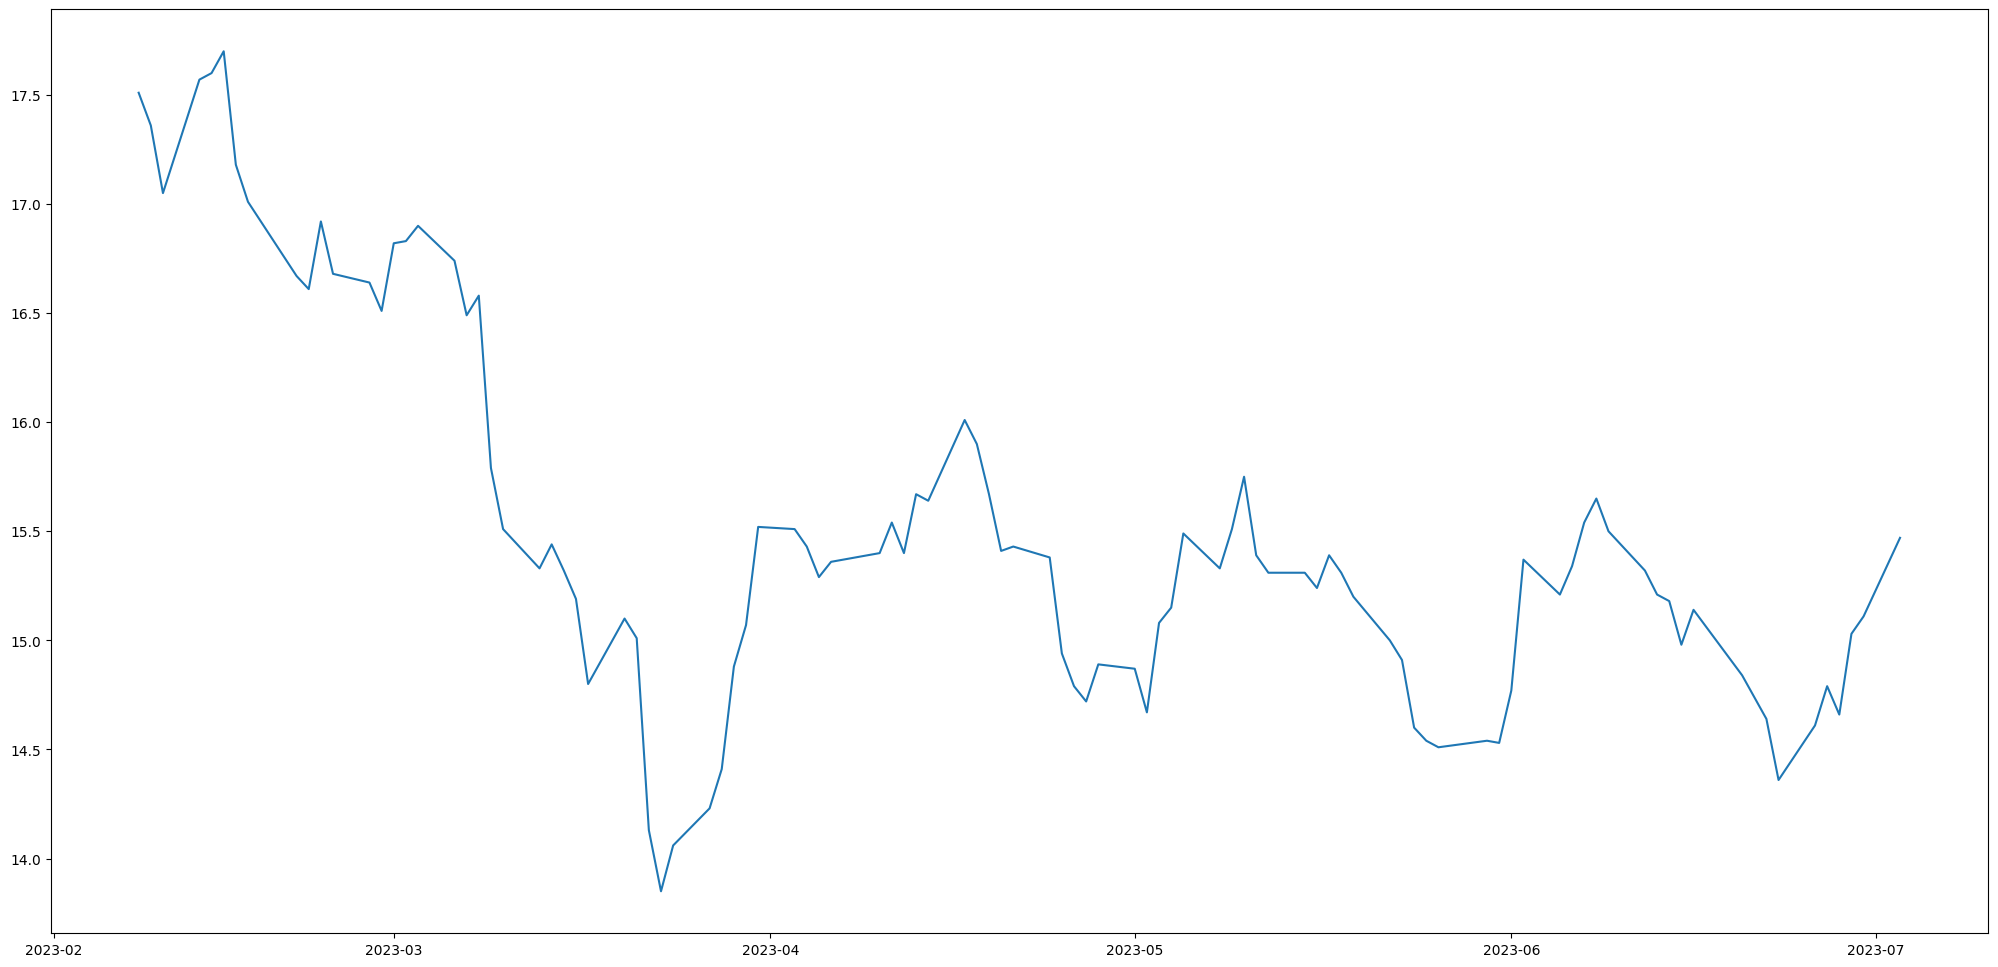

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,12))
plt.plot(df1['close'])
plt.show()

In [16]:
import yfinance as yf
ticker = 'SBIN.NS'
data = yf.download(tickers=ticker,period='1y')

[*********************100%***********************]  1 of 1 completed


In [17]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-05,475.149994,480.000000,471.000000,472.149994,463.149811,12003244
2022-07-06,475.149994,481.000000,473.899994,479.950012,470.801147,12059857
2022-07-07,484.000000,488.250000,481.600006,486.750000,477.471527,11497832
2022-07-08,489.000000,489.899994,485.149994,488.549988,479.237213,9057231
2022-07-11,485.000000,491.299988,485.000000,488.200012,478.893890,7704792
...,...,...,...,...,...,...
2023-06-29,566.099976,566.099976,566.099976,566.099976,566.099976,0
2023-06-30,574.000000,574.000000,570.200012,572.849976,572.849976,8718232
2023-07-03,574.500000,586.349976,573.900024,585.450012,585.450012,15421985


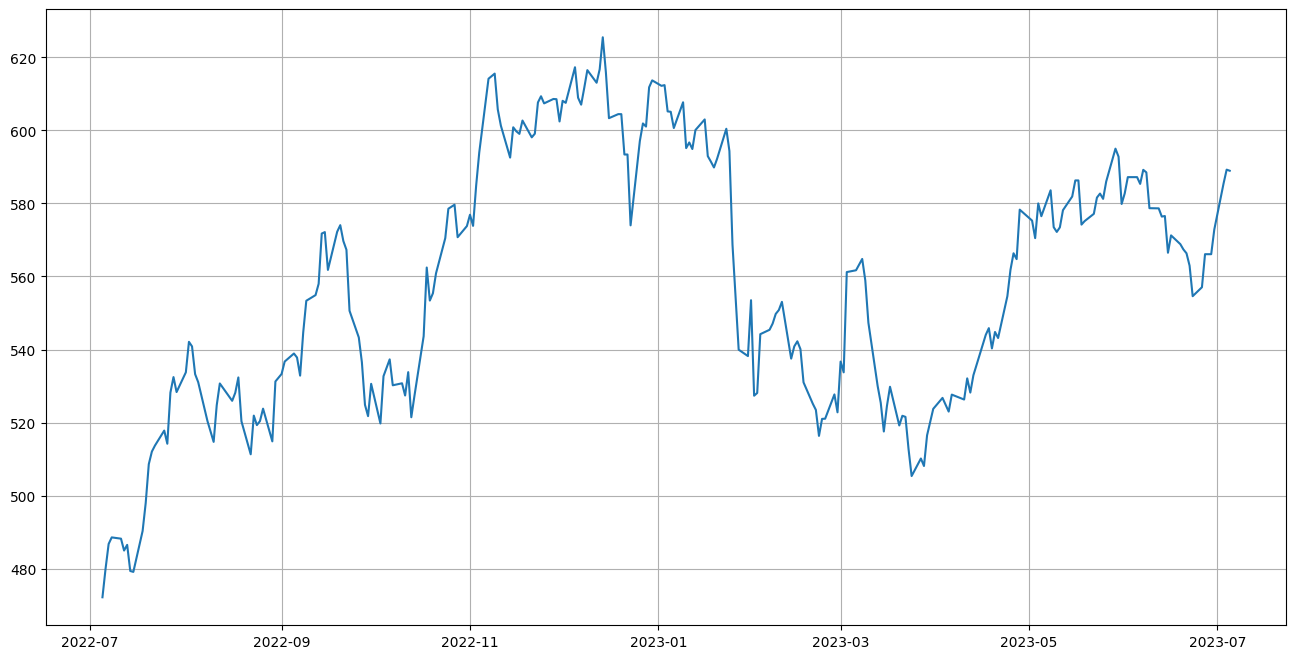

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(data['Close'])
plt.grid()
plt.show()